## Complementarity & Accessibilty

### 1.  Imports & Declarations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [29]:
# Load the dataset
file_path = "../data/processed/gm_raw.csv"
gm_data = pd.read_csv(file_path)
zones_dict_path = '../data/processed/zones_dict.csv'
zones_dict = pd.read_csv(zones_dict_path).set_index('Unnamed: 0').to_dict()

In [35]:
def euclid_dist(startLat, startLng, endLat, endLng):
    return np.sqrt((startLat-endLat)**2 + (startLng-endLng)**2) * 111.32

In [75]:
# calculate haversine distance in gm_data given startpositionlat, startpositionlng, endpositionlat, endpositionlng
def haversine_distance(startLat, startLng, endLat, endLng):
    # approximate radius of earth in km
    R = 6373.0

    startLat = np.radians(startLat)
    startLng = np.radians(startLng)
    endLat = np.radians(endLat)
    endLng = np.radians(endLng)

    dlon = endLng - startLng
    dlat = endLat - startLat

    a = np.sin(dlat / 2)**2 + np.cos(startLat) * np.cos(endLat) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance


### 2.  Trips profiling and statistics

#### 2.1 GreenMobility Dataset

In [58]:
# Calculate haversine distance
gm_data['HaversineDistance'] = haversine_distance(gm_data.startPositionLat, gm_data.startPositionLng, gm_data.endPositionLat, gm_data.endPositionLng)


Mean Euclidean Distance:  5.198749652770878


/var/folders/77/lfxftc1s7_bch_43_w38l1zh0000gn/T/ipykernel_88003/1427624344.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(gm_data['HaversineDistance'], bins=100, color='blue', palette='Blues_r', kde=True)


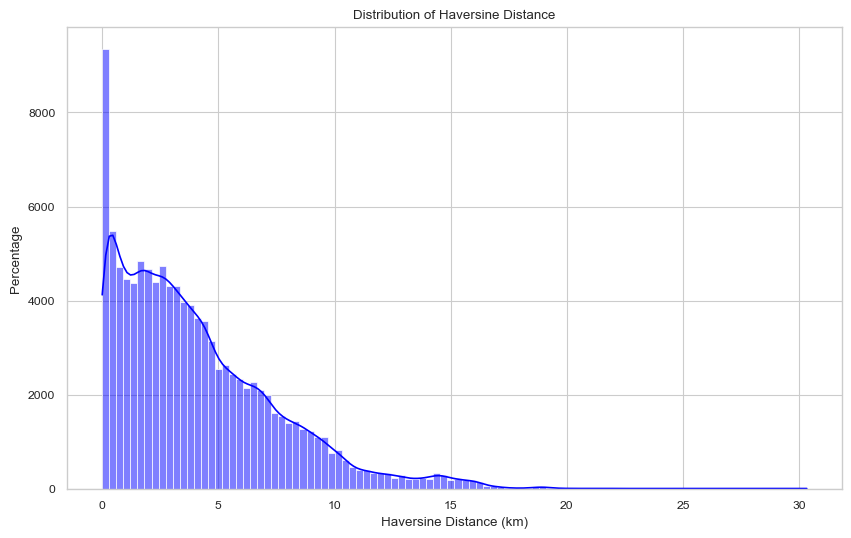

In [74]:
# distribution of haversine distance visuzaliations
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_palette('Blues_r')
sns.despine()
sns.histplot(gm_data['HaversineDistance'], bins=100, color='blue', palette='Blues_r', kde=True)
plt.ylabel('Percentage')
# plt.yticks(np.arange(0, 0.06, 0.01))
# plt.gca().yaxis.set_major_formatter('{:.0f}%'.format)
plt.xlabel('Haversine Distance (km)')
plt.title('Distribution of Haversine Distance')
# plt.savefig('../reports/figures/haversine_distance.png')
plt.show()